In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv('Covid_Twitter_Sentiment.csv', encoding='latin-1')

df.head()

,Text,sentiment
0,Hoy hace 867 días que el Gobierno Ayuso aprobó...,Negative
1,Its a myth that the COVID shots stop the spre...,Negative
2,Une membre du Parlement européen qualifie la v...,Negative
3,@fridawrites Im somewhat concerned to note th...,Negative
4,"Covid hit, WW3 about to start and now MonkeyPo...",Negative


In [ ]:
data = df[['Text']]
data.head()

,Text
0,Hoy hace 867 días que el Gobierno Ayuso aprobó...
1,Its a myth that the COVID shots stop the spre...
2,Une membre du Parlement européen qualifie la v...
3,@fridawrites Im somewhat concerned to note th...
4,"Covid hit, WW3 about to start and now MonkeyPo..."


In [ ]:
data= data.reset_index(drop=True)
data['process_tweet'] = data['Text'].copy()
data.head()

,Text,process_tweet
0,Hoy hace 867 días que el Gobierno Ayuso aprobó...,Hoy hace 867 días que el Gobierno Ayuso aprobó...
1,Its a myth that the COVID shots stop the spre...,Its a myth that the COVID shots stop the spre...
2,Une membre du Parlement européen qualifie la v...,Une membre du Parlement européen qualifie la v...
3,@fridawrites Im somewhat concerned to note th...,@fridawrites Im somewhat concerned to note th...
4,"Covid hit, WW3 about to start and now MonkeyPo...","Covid hit, WW3 about to start and now MonkeyPo..."


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 59.8 MB/s 
     |████████████████████████████████| 120 kB 73.7 MB/s 


In [ ]:
## imported libraries

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import transformers as ppb

from tqdm import tqdm_notebook as tqdm
import random
import matplotlib.pyplot as plt
import warnings


#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############

from keras.preprocessing.text import Tokenizer         #######
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dropout , Conv1D ,MaxPool1D,Activation , Dense , Flatten , Embedding , LSTM ####

from keras import utils
from keras.callbacks import ReduceLROnPlateau , EarlyStopping


#nltk

import nltk
from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######


from textblob import TextBlob # TextBlob - Python library for processing textual data

### Data preprocessing

In [ ]:
def clean_data(txt):
  txt = txt.lower()  # lowercase
  txt = re.sub(r'@[A-Za-z0-9_]+' , '' , txt)   #remove mentions
  txt = re.sub(r'#' , '' , txt) #remove hashtags
  txt = re.sub(r'RT : ','' , txt) # remove retweets
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\./\/]+' , '' , txt) #removes url
  txt = re.sub('\[.*?\]' , '' , txt) #remove square brackets
  txt = re.sub(r'[^\w\s]' , '' , txt) #remove puntuations
  txt = re.sub('\w*\d\w*' , '' ,txt) #removes words containig numbers
  txt = re.sub('\n' , '' ,txt) #remove new lines

  return txt

In [ ]:
data.head()

,Text,process_tweet
0,Hoy hace 867 días que el Gobierno Ayuso aprobó...,Hoy hace 867 días que el Gobierno Ayuso aprobó...
1,Its a myth that the COVID shots stop the spre...,Its a myth that the COVID shots stop the spre...
2,Une membre du Parlement européen qualifie la v...,Une membre du Parlement européen qualifie la v...
3,@fridawrites Im somewhat concerned to note th...,@fridawrites Im somewhat concerned to note th...
4,"Covid hit, WW3 about to start and now MonkeyPo...","Covid hit, WW3 about to start and now MonkeyPo..."


### PorterStemmer

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [ ]:
def stemming(txt):
  txt =[st.stem(word) for word in txt.split()]
  txt_join = ' '.join(txt)
  return txt_join

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(stemming)
data.head()

,Text,process_tweet
0,Hoy hace 867 días que el Gobierno Ayuso aprobó...,hoy hace 867 día que el gobierno ayuso aprobó ...
1,Its a myth that the COVID shots stop the spre...,it a myth that the covid shot stop the spread...
2,Une membre du Parlement européen qualifie la v...,une membr du parlement européen qualifi la vac...
3,@fridawrites Im somewhat concerned to note th...,@fridawrit im somewhat concern to note that t...
4,"Covid hit, WW3 about to start and now MonkeyPo...","covid hit, ww3 about to start and now monkeypo..."


### Using TextBlob calculate the polarity

In [ ]:
def get_text_polarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
data['Polarity'] = data['process_tweet'].apply(get_text_polarity)

## Labeling using the polarity score

In [ ]:
#Labeling
def get_text_analysis(i):
  if (i<-0.5):
    return 'Strongly Negative'
  elif ((i<0 ) and (i >= -0.5)):
    return 'Negative'
  elif (i == 0):
    return 'Neutral'
  elif (i>0 and i<=0.5):
    return 'Positive'
  else:
    return 'Strongly Positive'

In [ ]:
data['Sentiment'] = data['Polarity'].apply(get_text_analysis)

In [ ]:
#for deep learning we need to only 2 colums(sentiment and process tweet)
data = data[['Sentiment','process_tweet' ]]

possible_labels = data.Sentiment.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label'] = data.Sentiment.replace(label_dict)


print(label_dict)

data.head()

{'Neutral': 0, 'Positive': 1, 'Negative': 2, 'Strongly Positive': 3, 'Strongly Negative': 4}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Sentiment,process_tweet,label
0,Neutral,hoy hace 867 día que el gobierno ayuso aprobó ...,0
1,Positive,it a myth that the covid shot stop the spread...,1
2,Neutral,une membr du parlement européen qualifi la vac...,0
3,Neutral,@fridawrit im somewhat concern to note that t...,0
4,Negative,"covid hit, ww3 about to start and now monkeypo...",2


Text(0, 0.5, 'Label')

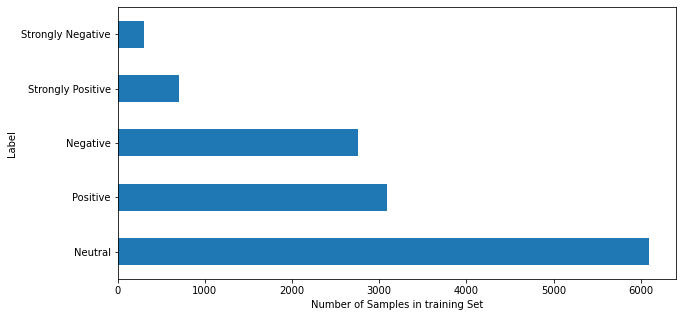

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax = data['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('Label')

### Total Unique words after pre processing

In [ ]:
unique_words = set(data['process_tweet'])
count = 0
for word in unique_words:
  count += 1
print(count)

6402


### tokenization

In [ ]:
#tokenization
tokenizer = Tokenizer(num_words=163967, split=' ')
#num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.


tokenizer.fit_on_texts(data['process_tweet'].values)

X = tokenizer.texts_to_sequences(data['process_tweet'].values)

In [ ]:
X[:3] #before padding

[[1216,
  2305,
  10115,
  859,
  70,
  124,
  2306,
  5418,
  5419,
  124,
  5420,
  70,
  6829,
  6830,
  294,
  302,
  5,
  160,
  6831,
  752,
  6832,
  543,
  6833,
  6834,
  498,
  5421,
  5422,
  6835,
  240,
  6836,
  237,
  1,
  124,
  2307,
  16,
  6837,
  3159,
  5423,
  4500,
  6838,
  5424,
  160,
  6839,
  5,
  5425],
 [140,
  5,
  3502,
  19,
  3,
  1,
  369,
  131,
  3,
  262,
  7,
  3,
  732,
  1752,
  27,
  3502,
  10,
  84,
  3,
  5426,
  7,
  702,
  6,
  880,
  19,
  33,
  163,
  381,
  1301,
  4,
  2081,
  13,
  12,
  14,
  10116],
 [1217,
  10117,
  332,
  10118,
  10119,
  4501,
  52,
  40,
  1753,
  119,
  1,
  10120,
  10121,
  37,
  881,
  5427,
  1258,
  5428,
  10122,
  1753,
  10123,
  10124,
  13,
  12,
  14,
  10125]]

In [ ]:
#padding to make all text vector to same length

X = pad_sequences(X)

X[:3] #after padding

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,  1216,  2305, 10115,
          859,    70,   124,  2306,  5418,  5419,   124,  5420,    70,
         6829,  6830,   294,   302,     5,   160,  6831,   752,  6832,
          543,  6833,  6834,   498,  5421,  5422,  6835,   240,  6836,
          237,     1,   124,  2307,    16,  6837,  3159,  5423,  4500,
         6838,  5424,   160,  6839,     5,  5425],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     

### RNN Model

In [ ]:
#creating models

model= Sequential()
model.add(Embedding(163967, 256 , input_length=X.shape[1]))
model.add(Dropout(0.3))


model.add(LSTM(128 , return_sequences=True , dropout=0.3 , recurrent_dropout=0.3))
model.add(LSTM(128,dropout=0.3 , recurrent_dropout=0.3))


model.add(Dense(5 , activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 105, 256)          41975552  
                                                                 
 dropout (Dropout)           (None, 105, 256)          0         
                                                                 
 lstm (LSTM)                 (None, 105, 128)          197120    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 42,304,901
Trainable params: 42,304,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
#one hot encoding

y = pd.get_dummies(data['Sentiment']).values

[print(data['Sentiment'][i] ,y[i]) for i in range(0,5)]

Neutral [0 1 0 0 0]
Positive [0 0 1 0 0]
Neutral [0 1 0 0 0]
Neutral [0 1 0 0 0]
Negative [1 0 0 0 0]


[None, None, None, None, None]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 22)

In [ ]:
#trannig model
batch_size = 128
epochs = 5

### Tranning the model

In [ ]:
history = model.fit(x_train , y_train ,
          epochs = epochs,
          batch_size = batch_size,
          validation_split=0.1,
          verbose=1)

Epoch 1/5
73/73 [==============================] - 77s 938ms/step - loss: 0.9672 - accuracy: 0.6149 - val_loss: 0.5705 - val_accuracy: 0.7782
Epoch 2/5
73/73 [==============================] - 67s 918ms/step - loss: 0.3877 - accuracy: 0.8668 - val_loss: 0.4301 - val_accuracy: 0.8476
Epoch 3/5
73/73 [==============================] - 68s 926ms/step - loss: 0.1725 - accuracy: 0.9444 - val_loss: 0.3936 - val_accuracy: 0.8785
Epoch 4/5
73/73 [==============================] - 67s 919ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.4036 - val_accuracy: 0.8717
Epoch 5/5
73/73 [==============================] - 66s 907ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.4562 - val_accuracy: 0.8660


In [ ]:
%%time
score = model.evaluate(x_test, y_test , batch_size = batch_size)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

21/21 [==============================] - 1s 69ms/step - loss: 0.5087 - accuracy: 0.8650

ACCURACY: 0.8649691343307495
LOSS: 0.5087152123451233
CPU times: user 1.48 s, sys: 23 ms, total: 1.5 s
Wall time: 2.6 s


In [ ]:
predictions = model.predict(x_test)
pred1 = np.argmax(predictions , axis=1)
pred1[:10]

array([2, 0, 1, 3, 1, 1, 1, 0, 1, 1])

In [ ]:
y_test = np.argmax(y_test , axis=1)

In [ ]:
print(confusion_matrix(y_test , pred1))

[[ 412   21   81    5    5]
 [  51 1134   54    9    4]
 [  44   23  559    1    9]
 [   7    4    3   27    0]
 [   1    3   25    0  110]]


### Classification Report

In [ ]:
print(classification_report(y_test , pred1))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       524
           1       0.96      0.91      0.93      1252
           2       0.77      0.88      0.82       636
           3       0.64      0.66      0.65        41
           4       0.86      0.79      0.82       139

    accuracy                           0.86      2592
   macro avg       0.81      0.80      0.80      2592
weighted avg       0.87      0.86      0.87      2592



### Accuracy score

In [ ]:
accuracy_score(y_test , pred1)

0.8649691358024691

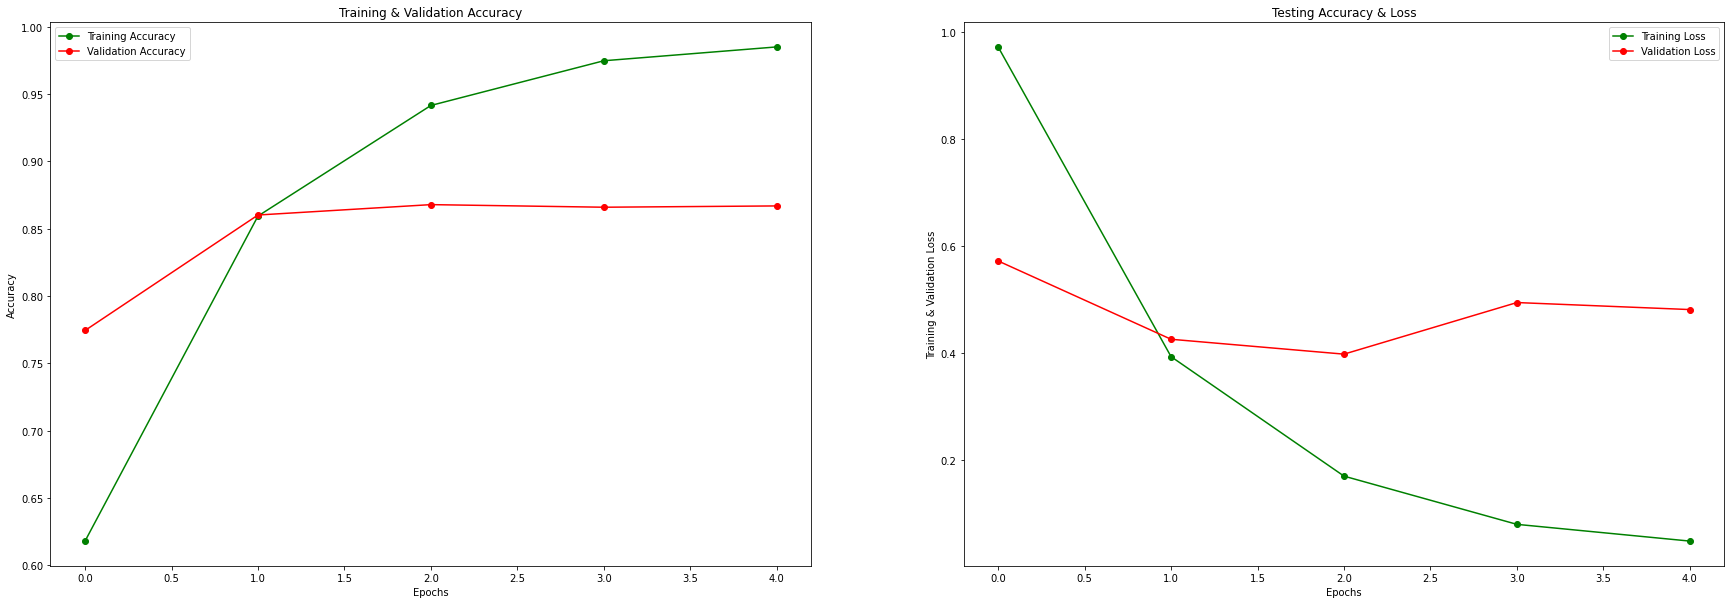

In [ ]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)


ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')

ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
df.head()

,Text,sentiment
0,Hoy hace 867 días que el Gobierno Ayuso aprobó...,Negative
1,Its a myth that the COVID shots stop the spre...,Negative
2,Une membre du Parlement européen qualifie la v...,Negative
3,@fridawrites Im somewhat concerned to note th...,Negative
4,"Covid hit, WW3 about to start and now MonkeyPo...",Negative


In [ ]:
df['sentiment'].value_counts()

Negative    6480
Positive    6480
Name: sentiment, dtype: int64

In [ ]:
df['sentiment'] = df['sentiment'].replace('Positive', 1)
df['sentiment'] = df['sentiment'].replace('Negative', 0)

In [ ]:
df.shape

(12960, 2)

In [ ]:
df['sentiment'].value_counts()

0    6480
1    6480
Name: sentiment, dtype: int64

In [ ]:
print(df)

                                                    Text  sentiment
0      Hoy hace 867 días que el Gobierno Ayuso aprobó...          0
1      Its a myth that the COVID shots stop the spre...          0
2      Une membre du Parlement européen qualifie la v...          0
3      @fridawrites Im somewhat concerned to note th...          0
4      Covid hit, WW3 about to start and now MonkeyPo...          0
...                                                  ...        ...
12955  @TruelyQ @4theluvofbj @_benjvmins_ Respectfull...          1
12956  RT @RebelNewsOnline: 'Today, Liberty Counsel s...          1
12957  RT @laurenmpayne: if you're going to that thin...          1
12958  RT @MaximeBernier: #FlashbackFriday \nContrary...          1
12959  RT @TeamPelosi: This weekend is 100 days to El...          1

[12960 rows x 2 columns]


In [ ]:
# checking out the negative comments from the train set

df[df['sentiment'] == 0].head(10)

,Text,sentiment
0,Hoy hace 867 días que el Gobierno Ayuso aprobó...,0
1,Its a myth that the COVID shots stop the spre...,0
2,Une membre du Parlement européen qualifie la v...,0
3,@fridawrites Im somewhat concerned to note th...,0
4,"Covid hit, WW3 about to start and now MonkeyPo...",0
5,Portugal May Reintroduce Strict COVID Restrict...,0
6,"@scrowder Let me guess, you still call Covid t...",0
7,"Oh, and @Leung__Wendy too:\n\nIs a COVID-19 en...",0
8,RT @ArtValley818_: BREAKING: Biden now sufferi...,0
9,RT @genxgmom: My effn boss has covid. Came in ...,0


In [ ]:
# checking out the postive comments from the train se
df[df['sentiment'] == 1].head(10)

,Text,sentiment
6480,@MontCoExec @MoCoDHHS @GovLarryHogan Now you c...,1
6481,@BenSmit07859562 @JAFMacDonald There can be li...,1
6482,RT @CIVlCSBOY: Ok I think when he got covid he...,1
6483,I am beyond confident you will benefit from wa...,1
6484,RT @VaxxedFox: Trump: Unvaccinated Soldiers De...,1
6485,RT @Freedom_1453: May?s ay?nda e?i Hadi Özer i...,1
6486,RT @LMucchielli: J'ai la joie et l'honneur de ...,1
6487,@AM_PMDespatch @JohnTShallow @ADFParty Digital...,1
6488,@Timodc Covid still exists.\n\nMonkeypox exist...,1
6489,"RT @POTUS: Folks, today I tested positive for ...",1


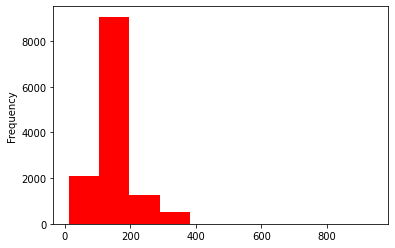

In [ ]:
# checking the distribution of tweets in the data

length_train = df['Text'].str.len().plot.hist(color = 'red', figsize = (6, 4))

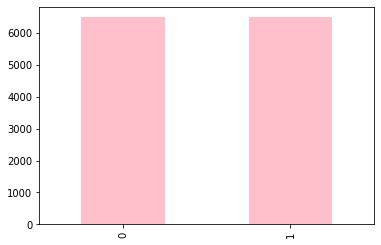

In [ ]:
df['sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [ ]:
# adding a column to represent the length of the tweet

df['len'] = df['Text'].str.len()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

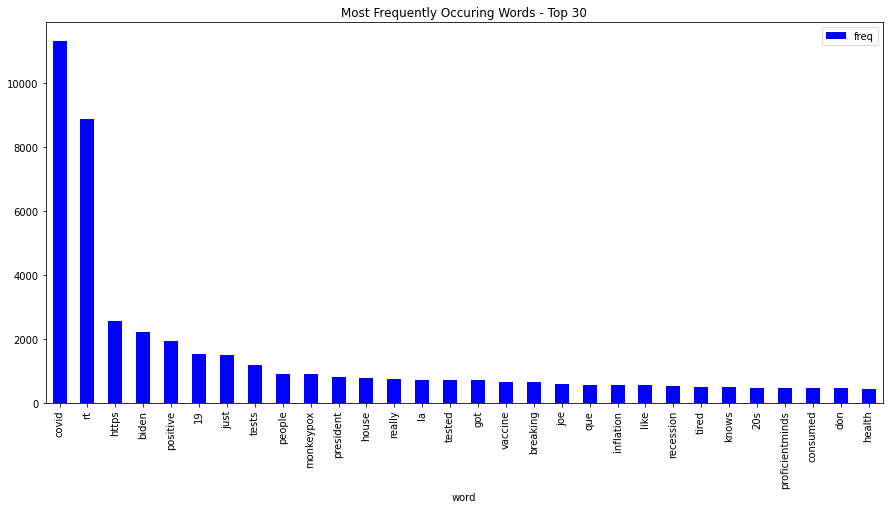

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'covid 19 tweet')

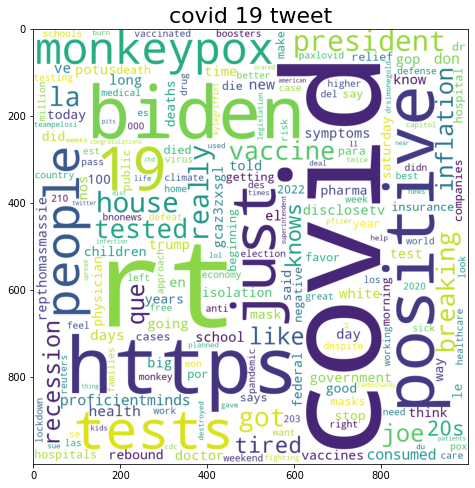

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("covid 19 tweet", fontsize = 22)

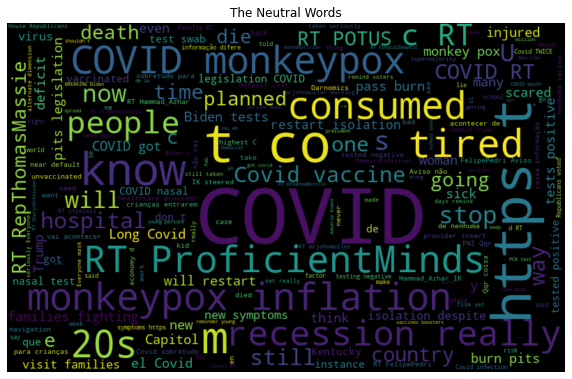

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

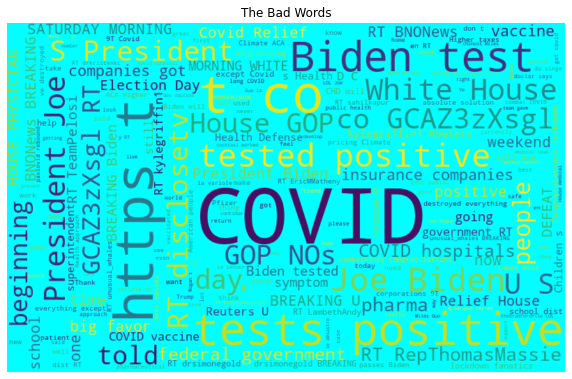

In [ ]:
negative_words =' '.join([text for text in df['Text'][df['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Bad Words')
plt.show()

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(df['Text'][df['sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['Text'][df['sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

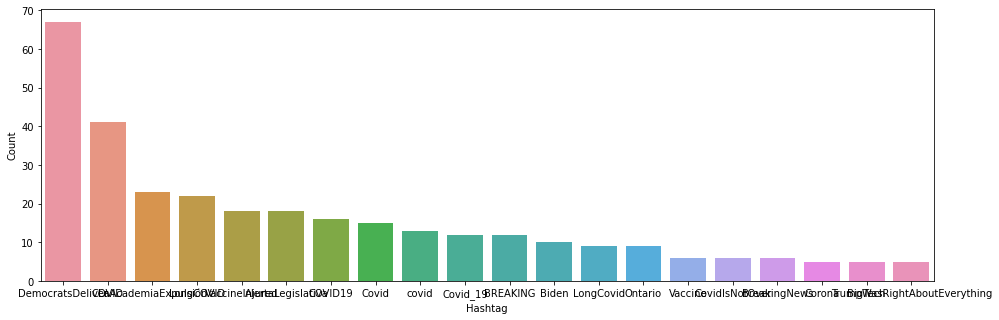

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

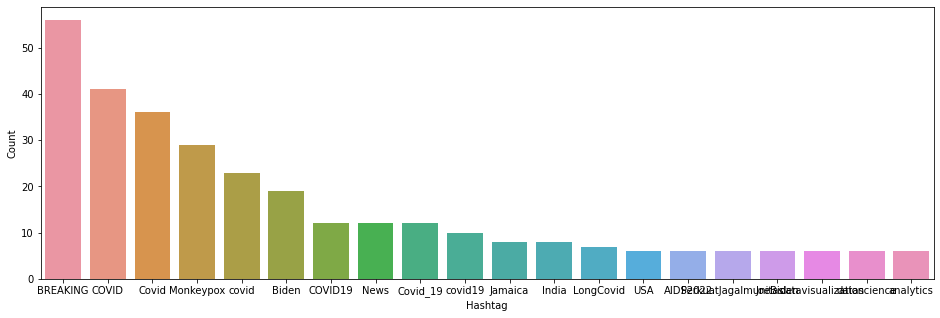

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
import nltk 

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
import re

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(df['Text'][df['sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['Text'][df['sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = df['Text'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df['Text']), epochs=20)

(4728005, 6126580)

In [ ]:
model_w2v.wv.most_similar(positive = "symptom")

[('disabilities', 0.6991910934448242),
 ('4.3', 0.6762104034423828),
 ('talks', 0.6697043776512146),
 ('@TaylorLorenz:', 0.659968376159668),
 ('immigration', 0.6547859311103821),
 ('@joncoopertweets', 0.6519852876663208),
 ('quitar', 0.6496676206588745),
 ('improving,', 0.6436952948570251),
 ('\x91Ultimately,', 0.6386748552322388),
 ('https://t.co/uI3r3p8DAV', 0.6383568048477173)]

In [ ]:
model_w2v.wv.most_similar(positive = "covid")

[('crowd', 0.46108776330947876),
 ('covid)', 0.4458101987838745),
 ('terrified', 0.4316245913505554),
 ('pa', 0.39799660444259644),
 ('surprising.', 0.39704570174217224),
 ('Lago', 0.39524024724960327),
 ('happen', 0.3938949704170227),
 ('car,', 0.3920705318450928),
 ('decide', 0.39107322692871094),
 ('silently', 0.3907066285610199)]

In [ ]:
model_w2v.wv.most_similar(positive = "people")

[('Guest:', 0.4956643581390381),
 ('@JohnRuddick2', 0.4888004660606384),
 ('retu', 0.486240416765213),
 ('alot', 0.48246508836746216),
 ('differences', 0.4802693724632263),
 ('@ryangerritsen:', 0.4702020585536957),
 ('to,', 0.4701484739780426),
 ('ju', 0.46942025423049927),
 ('tweets,', 0.4684409201145172),
 ('@hana___anah', 0.46813225746154785)]

In [ ]:
model_w2v.wv.most_similar(negative = "News")

[('1.', -0.04676301032304764),
 ('Who', -0.09123871475458145),
 ("isn't", -0.0940372422337532),
 ('start.', -0.10008443146944046),
 ('@jeffreyatucker:', -0.10331419110298157),
 ('RT', -0.10375633835792542),
 ('prescribed', -0.1038331538438797),
 ('Eric', -0.10949649661779404),
 ('The', -0.11242185533046722),
 ('miss', -0.11267521977424622)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["Text_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['Hoy', 'hace', '867', 'días', 'que', 'el', 'Gobierno', 'Ayuso', 'aprobó', 'el', 'Protocolo', 'que', 'impedía', 'trasladar', 'al', 'hospital', 'a', 'los', 'residentes', 'más', 'vulnerables.', '7.291', 'murieron', 'sin', 'recibir', 'atención', 'médica', '(5.795', 'con', 'covid).', 'El', '@fiscal_es', 'no', 'investiga.', 'Ellos', 'pasan,', 'nosotros', '#NoOlvidamos', '¿Se', 'lo', 'recordamos', 'a', 'diario?'], tags=['Text_0']),
 LabeledSentence(words=['It\x92s', 'a', 'myth', 'that', 'the', 'COVID', 'shots', 'stop', 'the', 'spread', 'of', 'the', 'virus.', 'Unfortunately', 'this', 'myth', 'is', 'still', 'the', 'basis', 'of', 'policies', 'and', 'decisions', 'that', 'are', 'causing', 'real', 'harm', 'to', 'Americans.', 'https://t.co/nyLWv2PiT3'], tags=['Text_1']),
 LabeledSentence(words=['Une', 'membre', 'du', 'Parlement', 'européen', 'qualifie', 'la', 'vaccination', 'contre', 'le', 'covid', 'sous', 'contrainte', 'de', '«', 'pire', 'crime', 'jamais', 'commis', 'contre'

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_corpus = []

for i in range(0, 12960):
  review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 3)
x = cv.fit_transform(train_corpus).toarray()
y = df.iloc[:, 1]

print(x.shape)
print(y.shape)

(12960, 3)
(12960,)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(9720, 3)
(3240, 3)
(9720,)
(3240,)


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 3)
x_test = cv.fit_transform(train_corpus).toarray()

print(x_test.shape)

(12960, 3)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.5300411522633744
Validation Accuracy : 0.542283950617284
F1 score : 0.4218323586744639
[[1216  430]
 [1053  541]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.5181069958847737
Validation Accuracy : 0.5219135802469136
f1 score : 0.6191295795426603
[[ 432 1214]
 [ 335 1259]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.5300411522633744
Validation Accuracy : 0.5419753086419753
f1 score : 0.421216848673947
[[1216  430]
 [1054  540]]


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.5300411522633744
Validation Accuracy : 0.542283950617284
f1 score : 0.4218323586744639
[[1216  430]
 [1053  541]]


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.5297325102880659
Validation Accuracy : 0.5413580246913581
f1 score : 0.42625482625482625
[[1202  444]
 [1042  552]]


In [ ]:
## ## Importing Necessary Libraries for Artificial Neural Network

In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
304/304 [==============================] - 3s 4ms/step - loss: 0.7013 - accuracy: 0.5058
Epoch 2/100
304/304 [==============================] - 2s 5ms/step - loss: 0.6930 - accuracy: 0.5168
Epoch 3/100
304/304 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.5132
Epoch 4/100
304/304 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5175
Epoch 5/100
304/304 [==============================] - 1s 3ms/step - loss: 0.6909 - accuracy: 0.5117
Epoch 6/100
304/304 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.5203
Epoch 7/100
304/304 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5227
Epoch 8/100
304/304 [==============================] - 1s 3ms/step - loss: 0.6899 - accuracy: 0.5237
Epoch 9/100
304/304 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5207
Epoch 10/100
304/304 [==============================] - 1s 3ms/step - loss: 0.6893 - accura

In [ ]:


# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[1202  444]
 [1042  552]]
